In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
from skimage.exposure import match_histograms
from matplotlib.colors import NoNorm

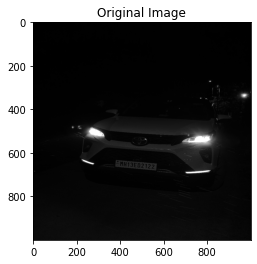

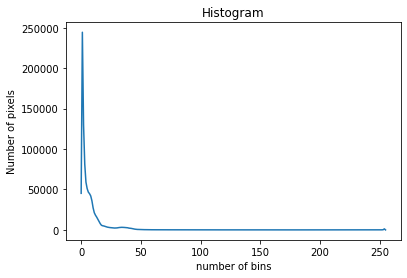

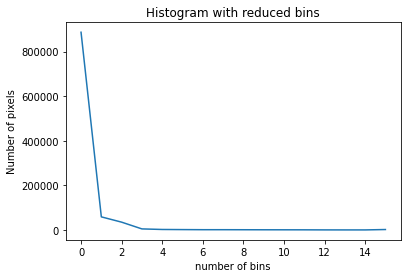

In [22]:
img = cv2.imread(r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision//Legender.jpg")

width=1000
height=1000
dim = (width, height)

resized = cv2.resize(img, dim)

resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,'gray')
plt.title('Original Image')
plt.show()

# find frequency of pixels in range 0-255, with 256 bins
histr = cv2.calcHist([gray],[0],None,[256],[0,255])


histr1 = cv2.calcHist([gray],[0],None,[16],[0,255])

# show the plotting graph of an image
plt.plot(histr)
plt.xlabel('number of bins')
plt.ylabel('Number of pixels')
plt.title('Histogram')
plt.show()

plt.plot(histr1)
plt.xlabel('number of bins')
plt.ylabel('Number of pixels')
plt.title('Histogram with reduced bins')

plt.show()

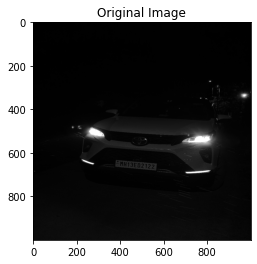

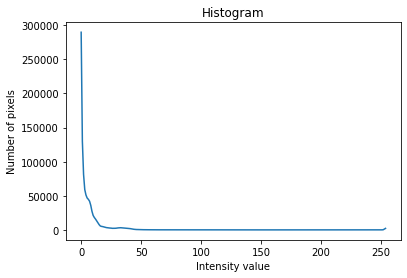

In [23]:
img = cv2.imread(r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision//Legender.jpg")

width=1000
height=1000
dim = (width, height)

resized = cv2.resize(img, dim)

resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,'gray')
plt.title('Original Image')
plt.show()

# find frequency of pixels in range 0-255 
histr = cv2.calcHist([gray],[0],None,[255],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.xlabel('Intensity value')
plt.ylabel('Number of pixels')
plt.title('Histogram')
plt.show()

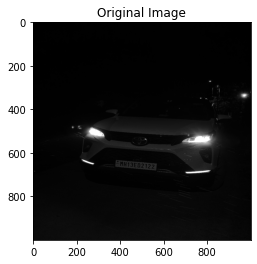

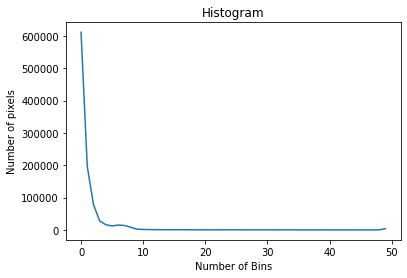

In [7]:
img = cv2.imread(r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision//Legender.jpg")


width=1000
height=1000
dim = (width, height)

resized = cv2.resize(img, dim)

resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,'gray')
plt.title('Original Image')
plt.show()

# find frequency of pixels in range 0-255 
histr = cv2.calcHist([gray],[0],None,[50],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.xlabel('Number of Bins')
plt.ylabel('Number of pixels')
plt.title('Histogram')
plt.show()

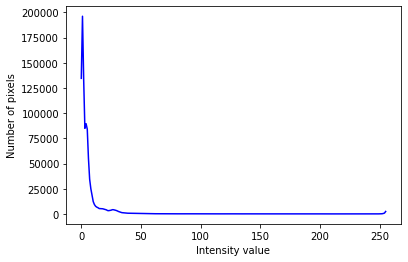

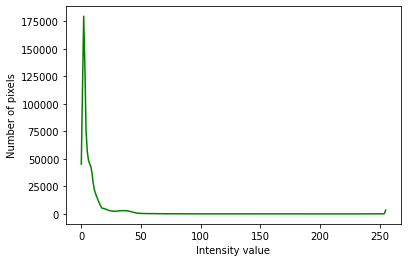

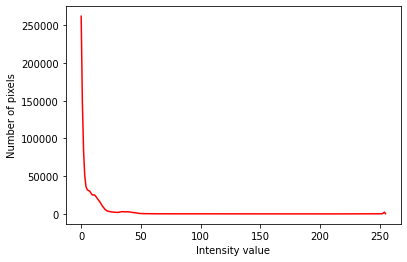

In [14]:
img = cv2.imread(r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Images//Legender.jpg")
color = ('b','g','r')

width=1000
height=1000
dim = (width, height)

resized = cv2.resize(img, dim)

'''
#hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))
'''

for i,col in enumerate(color):
    histr = cv2.calcHist([resized],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    
    plt.xlabel('Intensity value')
    plt.ylabel('Number of pixels')
    plt.show()

Text(0.5, 1.0, 'Original Image')

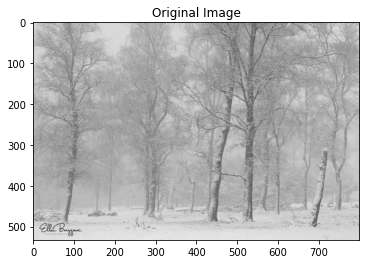

In [53]:
# reads an input image
img = cv2.imread(r"woods.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray,'gray')
plt.title('Original Image')

Text(0.5, 1.0, 'Original Image without normalization')

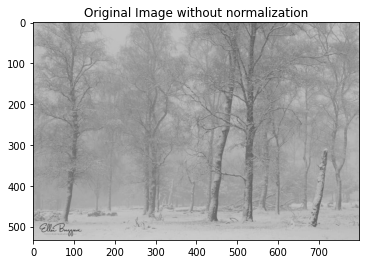

In [54]:
plt.imshow(gray,cmap ='gray', norm=NoNorm())
plt.title('Original Image without normalization')

In [55]:
gray.shape

(533, 800)

Text(0.5, 1.0, 'Original Image Histogram')

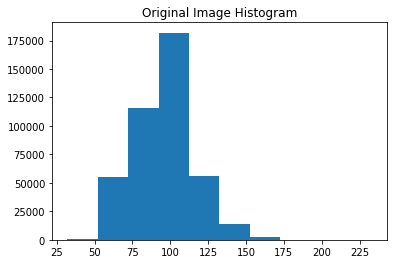

In [56]:
plt.hist(gray.flatten()*255)
plt.title('Original Image Histogram')

In [57]:
gray.min()

23

In [58]:
gray.max()

224

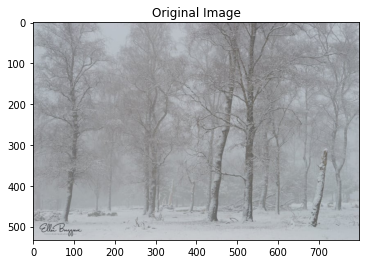

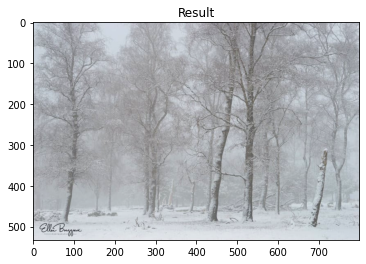

Text(0.5, 1.0, 'Original Image Histogram')

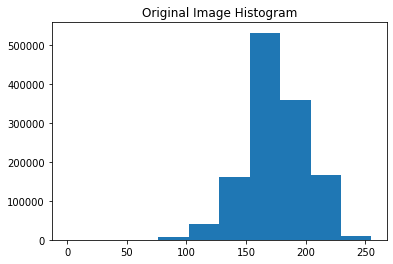

In [59]:
#Linear Strectching
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

plt.imshow(img.astype('uint8'))  # function is used to cast a pandas object to a specified data type
plt.title('Original Image')
plt.show()
# Define parameters.
r1 = 23
s1 = 0
r2 = 224
s2 = 255

# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)

# Apply contrast stretching.
linear_stretched = pixelVal_vec(img, r1, s1, r2, s2)

plt.imshow(linear_stretched.astype('uint8'))
plt.title('Result')
plt.show()


plt.hist(linear_stretched.flatten())
plt.title('Original Image Histogram')

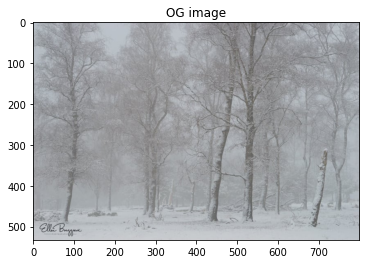

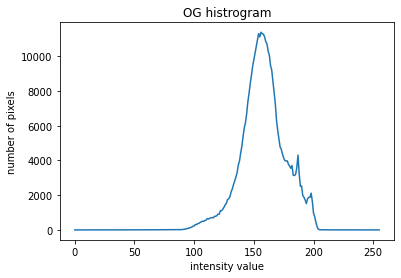

In [63]:
plt.imshow(img, 'gray')
plt.title('OG image')
plt.show()

histr = cv2.calcHist([img],[0], None, [256],[0,256])

plt.plot(histr)
plt.xlabel('intensity value')
plt.ylabel('number of pixels')
plt.title('OG histrogram')
plt.show()


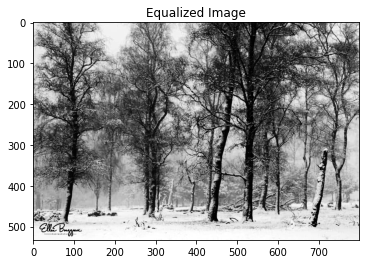

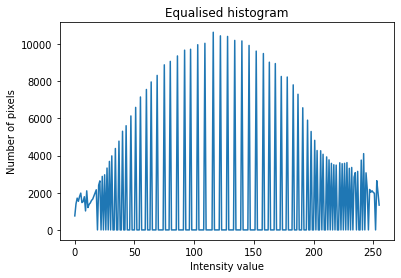

In [64]:

    #Apply histogram equalization
    equl = cv2.equalizeHist(gray)
    plt.imshow(equl,'gray')
    plt.title('Equalized Image')
    plt.show()
    
    
    histr2 = cv2.calcHist([equl],[0],None,[256],[0,256])
    
    plt.plot(histr2)
    plt.xlabel('Intensity value')
    plt.ylabel('Number of pixels')
    plt.title('Equalised histogram')
    plt.show()

In [15]:
#Histogram Matching
img1 = cv2.imread("Legender.jpg")
  
# checking the number of channels
print('No of Channel is: ' + str(img1.ndim))
  
# reading reference image
img2 = cv2.imread("R8.jpg")
  
# checking the number of channels
print('No of Channel is: ' + str(img2.ndim))
  
image = img1
reference = img2
  
matched = match_histograms(image, reference ,
                           multichannel=True)
  
  
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, 
                                    figsize=(8, 3))
  
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
  
ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
  
plt.tight_layout()
plt.show()
  
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
  
for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], 
                                            source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)
  
axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')
  
plt.tight_layout()
plt.show()

[ WARN:0@8449.359] global loadsave.cpp:248 findDecoder imread_('Legender.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'ndim'

/tmp/ipykernel_74233/2000691708.py:10: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  matched = match_histograms(image, reference,


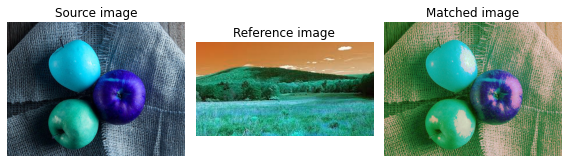

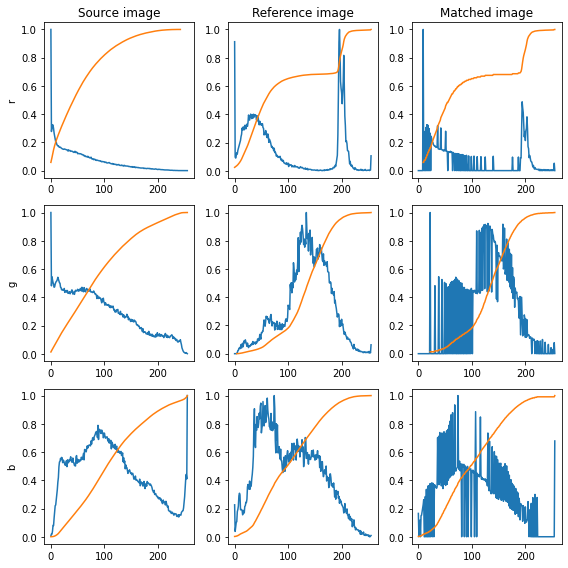

In [17]:
from skimage import data 
from skimage import exposure 
from skimage.exposure import match_histograms 
  
# loading data 
reference = cv2.imread(r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Images/Img01.jpeg") 
image = cv2.imread(r"/Users/shoumikdaterao/Desktop/TY Sem 5/Comp vision/Images/Img02.jpeg") 
  
# matching histograms 
matched = match_histograms(image, reference,  
                           multichannel=True,) 
  
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,  
                                    ncols=3,  
                                    figsize=(8, 3)) 
for aa in (ax1, ax2, ax3): 
    aa.set_axis_off() 
  
# displaying images 
ax1.imshow(image) 
ax1.set_title('Source image') 
ax2.imshow(reference) 
ax2.set_title('Reference image') 
ax3.imshow(matched) 
ax3.set_title('Matched image') 
  
plt.tight_layout() 
plt.show() 

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8)) 
  
for i, img in enumerate((image, reference, matched)): 
    for c, c_color in enumerate(('r', 'g', 'b')): 
        img_hist, bins = exposure.histogram(img[..., c], 
                                            source_range='dtype') 
        axes[c, i].plot(bins, img_hist / img_hist.max()) 
        img_cdf, bins = exposure.cumulative_distribution(img[..., c]) 
        axes[c, i].plot(bins, img_cdf) 
        axes[c, 0].set_ylabel(c_color) 
  
axes[0, 0].set_title('Source image') 
axes[0, 1].set_title('Reference image') 
axes[0, 2].set_title('Matched image') 
  
plt.tight_layout() 
plt.show() 